In [1]:
from __future__ import division
import numpy as np
import json
import re
import gzip
import pandas as pd
%pylab inline
pylab.rcParams['figure.figsize'] = (12.0, 8.0) # set size of figures"
plt.rcParams.update({'font.size': 24})
import seaborn as sns
import datetime

from IPython.html.widgets import *
from nvd3 import pieChart
import nvd3
nvd3.ipynb.initialize_javascript(use_remote=True)

from ethiopian_date import ethiopian_date

pd.set_option('display.max_rows', 50)

Populating the interactive namespace from numpy and matplotlib
loaded nvd3 IPython extension
run nvd3.ipynb.initialize_javascript() to set up the notebook
help(nvd3.ipynb.initialize_javascript) for options


/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
DF_weather = pd.read_excel('/Users/attiladobi/Documents/Ethiopia_ave_weather.xlsx', header=1).dropna(how='all').set_index(['city','Field'])
month_map = {'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6, 'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12 }


In [5]:
DF_weather

ANNUAL   JAN   FEB   MAR    APR    MAY    JUN    JUL  \
city        Field                                                             
Asosa       temp         22.1  21.4  22.8  24.5   25.1   23.8   21.6   20.3   
            prec_mm    1281.8   0.7   4.5  20.8   58.0  126.5  198.7  240.9   
            prec_days    89.2   1.7   2.3   3.4    5.2    8.9   12.8   15.1   
            rel_hum      51.1  33.0  28.9  29.7   36.6   52.1   62.5   73.2   
            dew_c        11.5   4.5   3.8   5.6    9.2   13.4   14.1   15.3   
Semera      temp         28.4  24.7  25.6  27.3   28.8   30.2   32.0   31.9   
            prec_mm      11.5   7.4   7.3  28.9   22.6   11.1    4.8   46.4   
            prec_days    29.4   1.2   1.2   1.3    2.0    2.9    3.9    4.1   
            rel_hum      70.6  70.3  69.0  69.3   71.7   72.8   66.7   64.9   
            dew_c        22.5  18.9  19.5  21.2   23.2   24.8   25.0   24.5   
Bahir Dar   temp         17.0  15.0  17.0  20.0   20.0   20.0   19.0   17.0   
            prec_mm    1430.0   3.0   1.0   8.0   25.0   83.0  182.0  434.0   
            prec_days     NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   
            rel_hum       NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   
            dew_c         NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   
Addis Ababa temp         16.0  16.0  17.0  17.0   17.0   18.0   17.0   15.0   
            prec_mm    1210.0  10.0  30.0  60.0   80.0   80.0  130.0  260.0   
            prec_days     NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   
            rel_hum      84.0  81.0  80.0  79.0   82.0   81.0   85.0   92.0   
            dew_c         8.0   6.0   7.0   8.0    9.0    8.0   10.0   11.0   
Dire Dawa   temp         24.0  21.0  22.0  24.0   25.0   26.0   28.0   25.0   
            prec_mm     610.0  20.0  40.0  50.0   80.0   10.0   30.0   80.0   
            prec_days    45.0   2.0   4.0   4.0    6.0    1.0    2.0    6.0   
            rel_hum      62.0  66.0  69.0  65.0   64.0   58.0   56.0   59.0   
            dew_c        16.0  14.0  15.0  17.0   17.0   16.0   17.0   15.0   
Gambela     temp         27.0  26.7  28.0  29.3   29.2   27.8   26.4   25.5   
            prec_mm    1204.9   6.5  10.1  29.6   62.6  148.1  160.8  230.3   
            prec_days    72.2   1.0   1.7   3.2    5.0    7.5   10.3   11.9   
            rel_hum      54.6  35.5  32.3  36.2   45.8   59.2   66.1   72.6   
            dew_c        17.1  10.2   9.9  12.8   16.3   19.1   19.6   20.2   
Harar       temp         19.5  17.1  18.4  19.9   20.6   21.6   21.9   20.8   
            prec_mm     791.2  19.7  28.0  59.4   94.9  102.3   65.2  108.7   
            prec_days    63.8   1.8   2.4   3.7    6.8    7.9    8.4    6.5   
            rel_hum      66.9  60.4  62.8  64.7   71.2   73.2   66.2   63.4   
            dew_c        13.2   9.4  11.2  13.1   15.2   16.6   15.3   13.6   
Jijiga      temp         18.9  16.6  17.8  19.2   19.8   20.8   20.9   20.3   
            prec_mm     776.4  11.2  29.3  50.7  105.8  101.6   56.6   94.1   
            prec_days    58.5   1.5   1.9   3.3    6.0    7.3    8.1    6.0   
            rel_hum      68.5  63.7  66.3  67.9   73.7   74.9   66.9   62.7   
            dew_c        13.0   9.7  11.4  13.1   15.0   16.2   14.5   13.0   
Hawassa     temp         23.2  24.0  24.5  25.0   24.5   23.5   22.0   21.5   
            prec_mm     965.0  30.0  45.0  65.0  100.0  120.0  105.0  130.0   
            prec_days   163.0   6.0   9.0  14.0   17.0   17.0   16.0   20.0   
            rel_hum       NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   
            dew_c         NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   
Mek'ele     temp         21.0  19.5  20.5  21.5   22.5   23.5   23.5   20.5   
            prec_mm     705.0  35.0  10.0  25.0   45.0   35.0   30.0  200.0   
            prec_days    85.0   4.0   1.0   4.0    5.0    4.0    6.0   22.0   
            rel_hum       NaN   NaN   NaN   NaN    NaN    NaN    NaN    N

In [6]:
DF_weather.loc['Asosa'].loc['temp'][1:]

JAN    21.4
FEB    22.8
MAR    24.5
APR    25.1
MAY    23.8
JUN    21.6
JUL    20.3
AUG    20.2
SEP    20.7
OCT    21.8
NOV    21.9
DEC    21.3
Name: temp, dtype: float64

<h1> map Ethiopian months </h1>

In [7]:
month_map = {}
for month in range(1,13):
    month_map.update({month:ethiopian_date.EthiopianDateConverter.date_to_ethiopian(datetime.date(2015,month,1)).month})

<h1> Plot average temperature </h1>

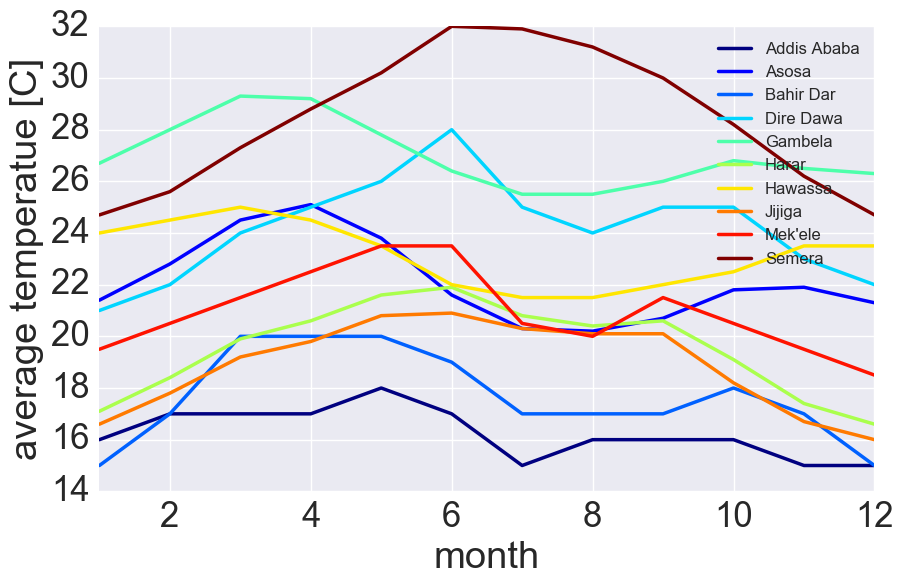

In [12]:
start,stop=0,1
number_of_colors= len(DF_weather.index.levels[0])
cm_subsection = linspace(start, stop, number_of_colors) 
colors = [ cm.jet(x) for x in cm_subsection ]

fig=figure()
fig.set_size_inches(10, 6)
sns.set_context("notebook", font_scale=2.5, rc={"lines.linewidth": 2.5})

for level,color in zip(DF_weather.index.levels[0],colors):
    plt.plot(range(1,13), DF_weather.loc[level].loc['temp'][1:].values, color= color, label = level)
plt.legend(fontsize=12)
xlim(1,12)
plt.xlabel('month')
plt.ylabel('average temperatue [C]')

#Add Ethiopian dates
#plt.xticks(range(1,13), month_map.values())

<h1> Average precipitation mm </h1>

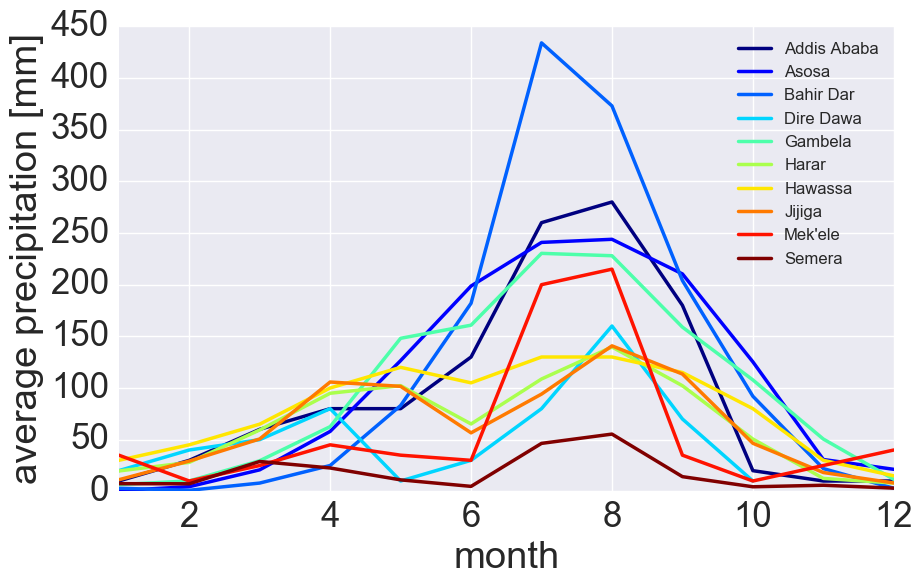

In [15]:
start,stop=0,1
number_of_colors= len(DF_weather.index.levels[0])
cm_subsection = linspace(start, stop, number_of_colors) 
colors = [ cm.jet(x) for x in cm_subsection ]

fig=figure()
fig.set_size_inches(10, 6)
sns.set_context("notebook", font_scale=2.5, rc={"lines.linewidth": 2.5})

for level,color in zip(DF_weather.index.levels[0],colors):
    plt.plot(range(1,13), DF_weather.loc[level].loc['prec_mm'][1:].values, color= color, label = level)
plt.legend(fontsize=12)
xlim(1,12)
plt.xlabel('month')
plt.ylabel('average precipitation [mm]')

#Add Ethiopian dates
#plt.xticks(range(1,13), month_map.values())

<h1> relative humidity </h1>

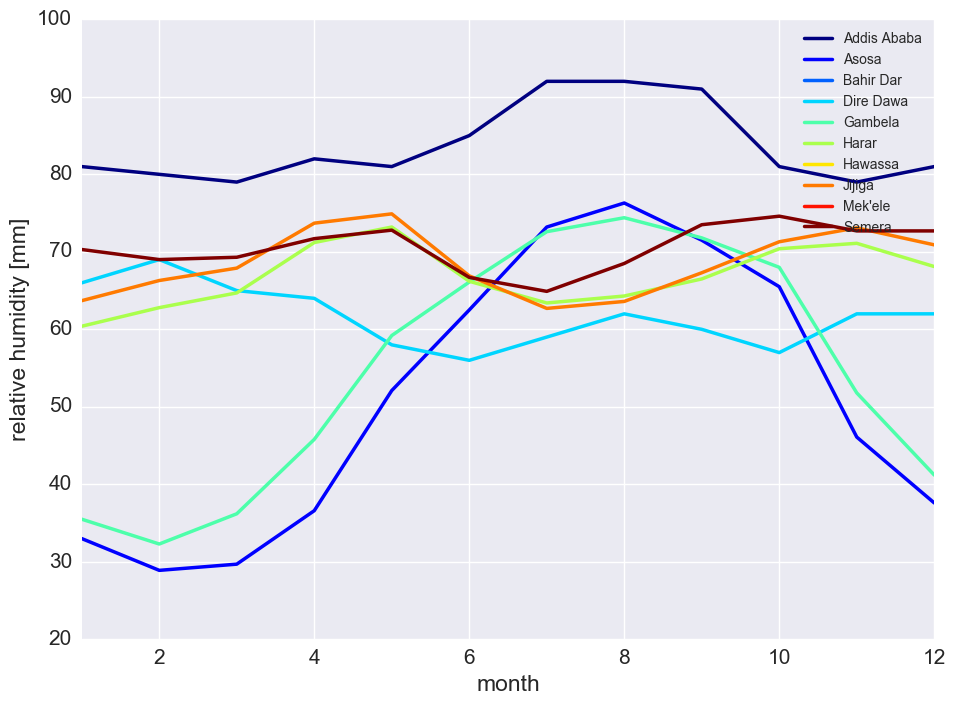

In [26]:
start,stop=0,1
number_of_colors= len(DF_weather.index.levels[0])
cm_subsection = linspace(start, stop, number_of_colors) 
colors = [ cm.jet(x) for x in cm_subsection ]

fig=figure()
fig.set_size_inches(11, 8)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

for level,color in zip(DF_weather.index.levels[0],colors):
    plt.plot(range(1,13), DF_weather.loc[level].loc['rel_hum'][1:].values, color= color, label = level)
plt.legend(fontsize=10)
xlim(1,12)
plt.xlabel('month')
plt.ylabel('relative humidity [mm]')